<a href="https://colab.research.google.com/github/JHL222/Python_StockPredict/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

#데이터를 다운로드할 주식의 심볼을 지정 / 시작, 종료날짜 지정
ticker = 'TSLA'
start_date = '2024-05-25'
end_date = '2024-06-06'

#지정된 기간 동안의 주식 가격 데이터를 포함하는 데이터프레임을 반환
tesla_data = yf.download(ticker, start=start_date, end=end_date)
#데이터프레임의 인덱스를 재설정
tesla_data.reset_index(inplace=True)
#데이터프레임의 'Date'(날짜), 'Open'(시가), 'High'(고가), 'Low'(저가),
#'Close'(종가), 'Volume'(거래량) 열을 선택
tesla_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume
0,2024-05-28,176.399994,178.250000,173.160004,176.750000,59736600
1,2024-05-29,174.190002,178.149994,173.929993,176.190002,54782600
2,2024-05-30,178.580002,182.669998,175.380005,178.789993,77784800
3,2024-05-31,178.500000,180.320007,173.820007,178.080002,67314600
4,2024-06-03,178.130005,182.639999,174.490005,176.289993,68568900
5,2024-06-04,174.779999,177.759995,174.000000,174.770004,60056300
6,2024-06-05,175.350006,176.149994,172.130005,175.000000,57614800


In [ ]:
import yfinance as yf

ticker = 'NVDA'
start_date = '2024-05-25'
end_date = '2024-06-06'

nvidia_data = yf.download(ticker, start=start_date, end=end_date)
nvidia_data.reset_index(inplace=True)
nvidia_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume
0,2024-05-28,1102.439941,1149.390015,1098.829956,1139.010010,65272800
1,2024-05-29,1130.500000,1154.920044,1109.010010,1148.250000,55744200
2,2024-05-30,1146.500000,1158.189941,1096.630005,1105.000000,48735000
3,2024-05-31,1125.199951,1127.170044,1069.400024,1096.329956,61326300
4,2024-06-03,1136.209961,1150.000000,1120.030029,1150.000000,43839200
5,2024-06-04,1157.160034,1166.000000,1140.449951,1164.369995,40332400
6,2024-06-05,1183.709961,1224.489990,1174.680054,1224.400024,51210300


In [ ]:
import yfinance as yf
import pandas as pd

# 테슬라(TSLA) 티커 가져오기
ticker = 'TSLA'
tesla = yf.Ticker(ticker)

# 재무제표 데이터 가져오기
financials = tesla.financials
balance_sheet = tesla.balance_sheet
cashflow = tesla.cashflow

# 주요 재무 지표 가져오기
stats = tesla.info
pe_ratio = stats.get('trailingPE')
eps = stats.get('trailingEps')

# 필요한 데이터 프레임으로 정리하기
financial_data = pd.DataFrame({
    'Date': financials.columns,
    'Revenue': financials.loc['Total Revenue'],
    'Net Income': financials.loc['Net Income'],
    'EPS': eps,
    'PE Ratio': pe_ratio
}).reset_index(drop=True)

print(financial_data[['Date', 'Revenue', 'Net Income', 'EPS', 'PE Ratio']])


        Date        Revenue     Net Income  EPS   PE Ratio
0 2023-12-31  96773000000.0  14999000000.0  3.9  44.871796
1 2022-12-31  81462000000.0  12583000000.0  3.9  44.871796
2 2021-12-31  53823000000.0   5524000000.0  3.9  44.871796
3 2020-12-31  31536000000.0    721000000.0  3.9  44.871796


In [ ]:
import yfinance as yf
import pandas as pd

# 엔비디아(NVDA) 티커 가져오기
ticker = 'NVDA'
nvidia = yf.Ticker(ticker)

# 재무제표 데이터 가져오기
financials = nvidia.financials
balance_sheet = nvidia.balance_sheet
cashflow = nvidia.cashflow

# 주요 재무 지표 가져오기
stats = nvidia.info
pe_ratio = stats.get('trailingPE')
eps = stats.get('trailingEps')

# 필요한 데이터 프레임으로 정리하기
financial_data = pd.DataFrame({
    'Date': financials.columns,
    'Revenue': financials.loc['Total Revenue'],
    'Net Income': financials.loc['Net Income'],
    'EPS': eps,
    'PE Ratio': pe_ratio
}).reset_index(drop=True)

print(financial_data[['Date', 'Revenue', 'Net Income', 'EPS', 'PE Ratio']])


        Date        Revenue     Net Income    EPS  PE Ratio
0 2024-01-31  60922000000.0  29760000000.0  17.14  71.43524
1 2023-01-31  26974000000.0   4368000000.0  17.14  71.43524
2 2022-01-31  26914000000.0   9752000000.0  17.14  71.43524
3 2021-01-31  16675000000.0   4332000000.0  17.14  71.43524


In [ ]:
import requests
import json

def fetch_news(api_key, query, from_date, to_date, language='en', page_size=5):
    url = f'https://newsapi.org/v2/everything?q={query}&from={from_date}&to={to_date}&language={language}&pageSize={page_size}&apiKey={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        news_data = json.loads(response.text)
        articles = news_data['articles']
        formatted_articles = []
        for article in articles:
            formatted_article = {
                'date': article['publishedAt'][:10],
                'headline': article['title'],
                'content': article['description'],
                'source': article['source']['name']
            }
            formatted_articles.append(formatted_article)
        return formatted_articles
    else:
        print("Failed to fetch news:", response.status_code)

# API 키와 검색어 설정
api_key = 'e8cf87140b4743aba48374bb7c028791'
query = 'tech stocks'
from_date = '2024-05-25'
to_date = '2024-06-06'

# 뉴스 가져오기
news_articles = fetch_news(api_key, query, from_date, to_date)

# 가져온 뉴스 출력
for article in news_articles:
    print(article)


{'date': '2024-06-03', 'headline': "Inside China's plan for AI: shape reality and enforce its power", 'content': 'The Chinese government has final sign-off on large language models and the data they were trained on.', 'source': 'Business Insider'}
{'date': '2024-05-28', 'headline': 'The Stock Market Keeps Going Back and Forth on Interest Rates. How to Play It.', 'content': 'The S&P 500 is rising. Bond yields are up. Consumer confidence improves.', 'source': "Barron's"}
{'date': '2024-06-04', 'headline': "With Paramount's long and winding sales process coming to an end, here's what comes next for the media giant", 'content': "Paramount's lengthy sales process ends with a deal from Skydance valuing it at $8 billion.", 'source': 'Business Insider'}
{'date': '2024-05-28', 'headline': "As Windows 10's death looms, Microsoft recommends upgrading to Windows 11 because it will help you stay updated on celebrity gossip, stocks, and weather updates", 'content': "As Windows 10's end-of-support lo

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import requests
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def fetch_news(api_key, query, from_date, to_date, language='en', page_size=10):
    url = f'https://newsapi.org/v2/everything?q={query}&from={from_date}&to={to_date}&language={language}&pageSize={page_size}&apiKey={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        news_data = json.loads(response.text)
        articles = news_data['articles']
        formatted_articles = []
        for article in articles:
            formatted_article = {
                'date': article['publishedAt'][:10],
                'headline': article['title'],
                'content': article['description'],
                'source': article['source']['name']
            }
            formatted_articles.append(formatted_article)
        return formatted_articles
    else:
        print("Failed to fetch news:", response.status_code)

api_key = 'e8cf87140b4743aba48374bb7c028791'
query = 'tech stocks'
from_date = '2024-05-25'
to_date = '2024-06-06'

news_articles = fetch_news(api_key, query, from_date, to_date)

analyzer = SentimentIntensityAnalyzer()

for article in news_articles:
    headline_sentiment = analyzer.polarity_scores(article['headline'])
    if article['content']:
        content_sentiment = analyzer.polarity_scores(article['content'])
        print("Headline Sentiment:", headline_sentiment)
        print("Content Sentiment:", content_sentiment)
        print()
    else:
        print("Content is missing for this article:", article['headline'])


Headline Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Content Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Headline Sentiment: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.6597}
Content Sentiment: {'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.7269}

Headline Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Content Sentiment: {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.34}

Headline Sentiment: {'neg': 0.226, 'neu': 0.629, 'pos': 0.145, 'compound': -0.3818}
Content Sentiment: {'neg': 0.117, 'neu': 0.671, 'pos': 0.212, 'compound': 0.5719}

Content is missing for this article: No one gets in trouble owning too many tech stocks: Chart of the Week
Headline Sentiment: {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.25}
Content Sentiment: {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.7845}

Headline Sentiment: {'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4019}
Content Sentiment: {'

In [ ]:
import yfinance as yf
import pandas as pd

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_moving_average(data, window=20):
    data['MA'] = data['Close'].rolling(window=window).mean()
    return data

def buy_signal(data):
    if data['Close'] > data['MA']:
        return True
    else:
        return False

def sell_signal(data):
    if data['Close'] < data['MA']:
        return True
    else:
        return False

# 설정
ticker = 'TSLA'
start_date = '2024-01-01'
end_date = '2024-12-31'
investment_amount = 10000  # 투자 금액
window = 20  # 이동평균 계산에 사용할 기간

# 데이터 가져오기
stock_data = get_stock_data(ticker, start_date, end_date)

# 이동평균 계산
stock_data = calculate_moving_average(stock_data, window)

# 매매 시그널 생성
stock_data['Buy Signal'] = stock_data.apply(buy_signal, axis=1)
stock_data['Sell Signal'] = stock_data.apply(sell_signal, axis=1)

# 초기 자본
capital = investment_amount

# 자동 매매
for index, row in stock_data.iterrows():
    if row['Buy Signal']:
        shares_to_buy = capital // row['Close']
        capital -= shares_to_buy * row['Close']
    elif row['Sell Signal']:
        shares_to_sell = capital // row['Close']  # 매도할 주식 수 계산
        capital += shares_to_sell * row['Close']  # 자본 업데이트
# 최종 자본
final_capital = capital
print("Final Capital:", final_capital)


[*********************100%%**********************]  1 of 1 completed

Final Capital: 30.97320556640625


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 14, 64)            17920     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Loaded model weights from disk
1/1 [==============================] - 3s 3s/step
(12, 1) (12, 1)
(12,)
(12,)


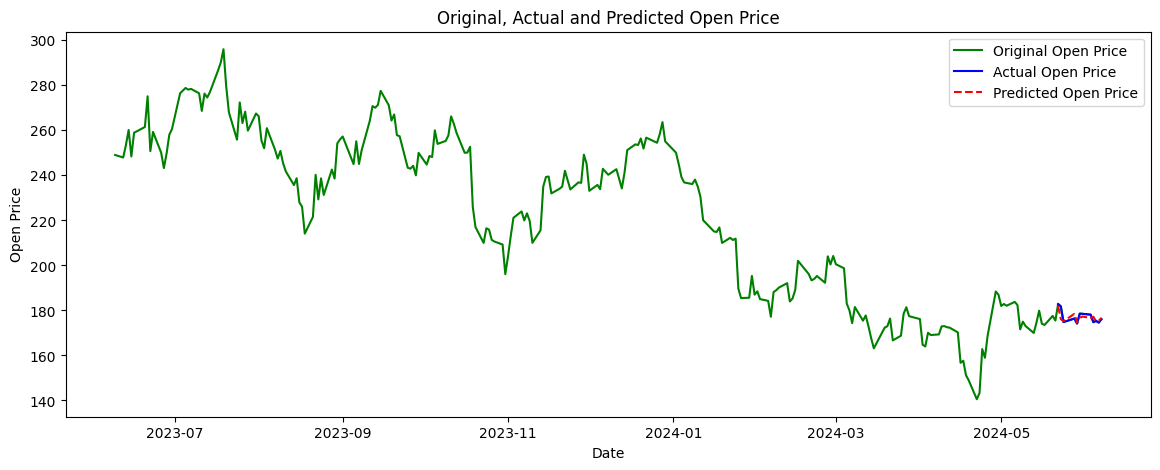

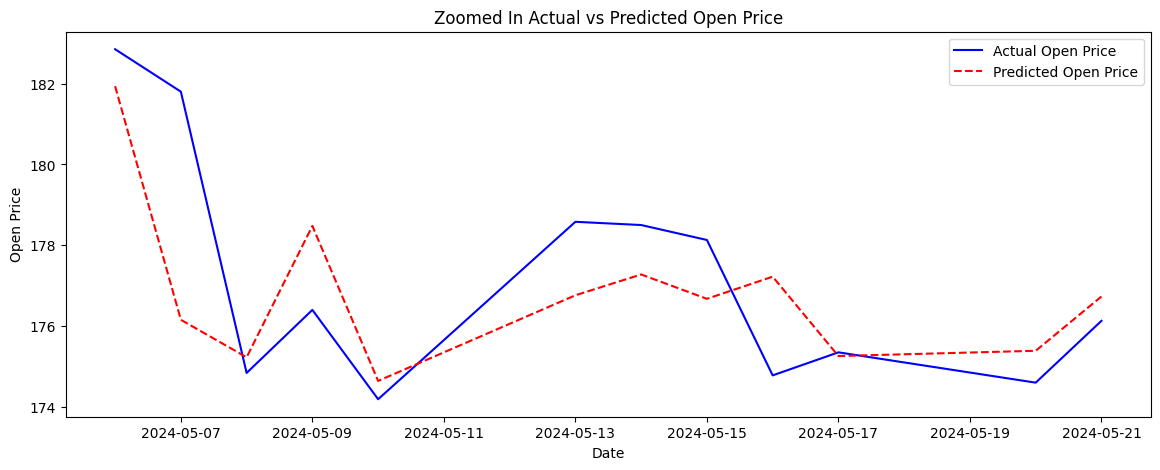

In [14]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

stock_data = pd.read_csv('sample_data/TSLA.csv')
stock_data.drop(['Adj Close'], axis=1, inplace=True)

original_open = stock_data['Open'].values

dates = pd.to_datetime(stock_data['Date'])

cols = list(stock_data)[1:6]

stock_data = stock_data[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(stock_data)
stock_data_scaled = scaler.transform(stock_data)

n_train = int(0.9 * stock_data_scaled.shape[0])
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]

pred_days = 1
seq_len = 14
input_dim = 5

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train - pred_days + 1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled) - pred_days + 1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

save_dir = './save_weights'
save_path = os.path.join(save_dir, 'lstm_weights.h5')

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

try:
    model.load_weights(save_path)
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.1, verbose=1)
    model.save_weights(save_path)

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()

prediction = model.predict(testX)
print(prediction.shape, testY.shape)

mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)
mean_values_pred[:, 0] = np.squeeze(prediction)
y_pred = scaler.inverse_transform(mean_values_pred)[:, 0]
print(y_pred.shape)

mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)
mean_values_testY[:, 0] = np.squeeze(testY)
testY_original = scaler.inverse_transform(mean_values_testY)[:, 0]
print(testY_original.shape)

plt.figure(figsize=(14, 5))

plt.plot(dates, original_open, color='green', label='Original Open Price')
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Open Price')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()

zoom_start = len(test_dates) - 50
zoom_end = len(test_dates)

plt.figure(figsize=(14, 5))

adjusted_zoom_start = max(0, zoom_start - seq_len)
adjusted_zoom_end = max(0, zoom_end - seq_len)

num_points_to_plot = min(len(test_dates[zoom_start:zoom_end]),
                         len(testY_original[adjusted_zoom_start:adjusted_zoom_end]))

plt.plot(test_dates[zoom_start:zoom_end][:num_points_to_plot],
         testY_original[adjusted_zoom_start:adjusted_zoom_end][:num_points_to_plot],
         color='blue',
         label='Actual Open Price')

plt.plot(test_dates[zoom_start:zoom_end][:num_points_to_plot],
         y_pred[adjusted_zoom_start:adjusted_zoom_end][:num_points_to_plot],
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()


In [ ]:
# import libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

# read the csv file
stock_data = pd.read_csv('sample_data/TSLA.csv')
stock_data.drop(['Adj Close'], axis=1, inplace=True) # delete adjusted close

# save original 'Open' prices for later
original_open = stock_data['Open'].values

# separate dates for future plotting
dates = pd.to_datetime(stock_data['Date'])

# variables for training
cols = list(stock_data)[1:6]

# new dataframe with only training data - 5 columns
stock_data = stock_data[cols].astype(float)

# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(stock_data)
stock_data_scaled = scaler.transform(stock_data)

# split to train data and test data
n_train = int(0.9*stock_data_scaled.shape[0])
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]
# print(test_dates.head(5))

# data reformatting for LSTM
pred_days = 1  # prediction period
seq_len = 14   # sequence length = past days for future prediction.
input_dim = 5  # input_dimension = ['Open', 'High', 'Low', 'Close', 'Volume']

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# print(trainX.shape, trainY.shape)
# print(testX.shape, testY.shape)

# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
               return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

# specify your learning rate
learning_rate = 0.01
# create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
# compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mse')

# 저장 디렉토리 경로 설정
save_dir = './save_weights'
save_path = os.path.join(save_dir, 'lstm_weights.h5')

# 디렉토리가 없으면 생성
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Try to load weights
try:
    model.load_weights(save_path)
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    # Fit the model
    history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)
    # Save model weights after training
    model.save_weights(save_path)

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()


# prediction
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

# generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# substitute predictions into the first column
mean_values_pred[:, 0] = np.squeeze(prediction)

# inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:,0]
print(y_pred.shape)

# generate array filled with means for testY
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# substitute testY into the first column
mean_values_testY[:, 0] = np.squeeze(testY)

# inverse transform
testY_original = scaler.inverse_transform(mean_values_testY)[:,0]
print(testY_original.shape)

# plotting
plt.figure(figsize=(14, 5))

# plot original 'Open' prices
plt.plot(dates, original_open, color='green', label='Original Open Price')

# plot actual vs predicted
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Open Price')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()

# Calculate the start and end indices for the zoomed plot
zoom_start = len(test_dates) - 50
zoom_end = len(test_dates)

# Create the zoomed plot
plt.figure(figsize=(14, 5))

# Adjust the indices for y values by subtracting seq_len
# Ensure the adjusted indices are valid
adjusted_zoom_start = max(0, zoom_start - seq_len)
adjusted_zoom_end = max(0, zoom_end - seq_len)

# Calculate the number of points to plot
num_points_to_plot = min(len(test_dates[zoom_start:zoom_end]),
                         len(testY_original[adjusted_zoom_start:adjusted_zoom_end]))

# Plot the actual open prices
plt.plot(test_dates[zoom_start:zoom_end][:num_points_to_plot],
         testY_original[adjusted_zoom_start:adjusted_zoom_end][:num_points_to_plot],
         color='blue',
         label='Actual Open Price')

# Plot the predicted open prices
plt.plot(test_dates[zoom_start:zoom_end][:num_points_to_plot],
         y_pred[adjusted_zoom_start:adjusted_zoom_end][:num_points_to_plot],
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()
